<a href="https://colab.research.google.com/github/apledepla/SA2_AFUNDAR_CUERDO_RODILLAS/blob/task6/TASK_6_Afundar%2C_Cuerdo%2C_Rodillas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probability Density Estimation

In [1]:
library(readr)
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
df <- read.csv("diabetes.csv")
head(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


Understanding the underlying distribution of medical variables is essential in statistical modeling and inference. In this component, performing Probability Density Estimation on key continuous variables in the dataset, including **Glucocse, BMI, age, and Insulin**.

This will allow to assess distribution, shape, skewness, and compare them with theoretical distributions.


Furthermore, this component explores the empirical distributions of key variables and compares them to theoretical probability distributions, namely normal and binomial distribution, to guide appropriate model selection and transformations for predicting which variable predicts diabetes.

## Histogram with KDE

In [7]:
plot_density <- function(data, var_name) {
  ggplot(data, aes(x = .data[[var_name]])) +
    geom_histogram(aes(y = after_stat(density)), fill = "lightblue", color = "black", bins = 30) +
    geom_density(color = "darkred", linewidth = 1.2) +
    labs(title = paste("Histogram and Density of", var_name),
         x = var_name, y = "Density") +
    theme_minimal()
}

In this section, histograms and Kernel Density Estimates (KDE) were plotted to visualize the empircial distribution. This will allow to assess distribution, shape, skewness, and compare them with theoretical distributions.

#### Plot for Glucose

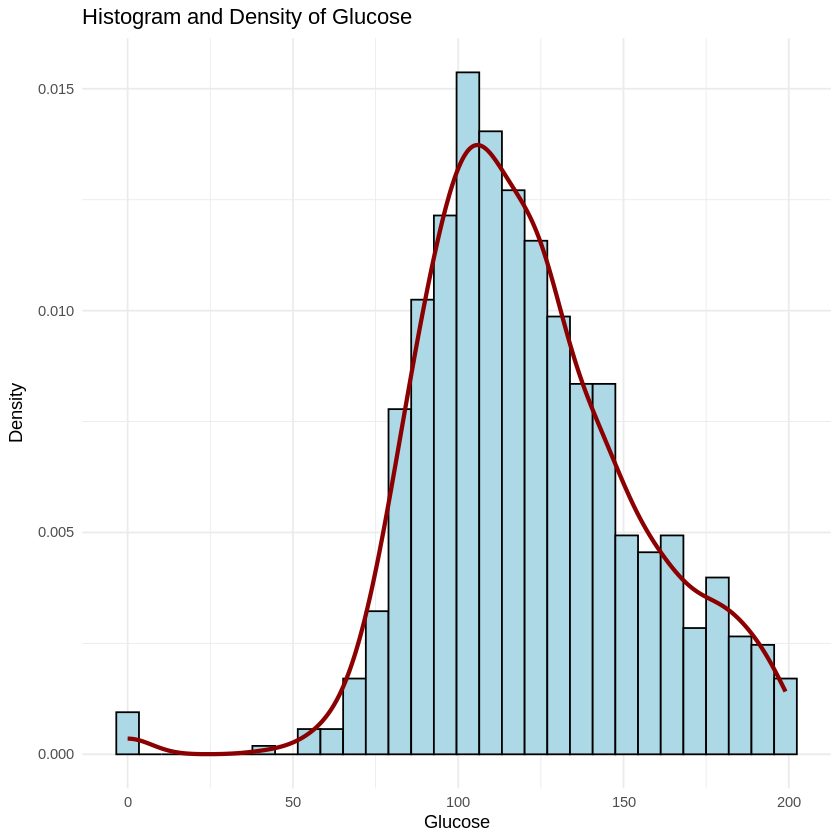

In [8]:
plot_density(df, "Glucose")

**Figure 1. Histogram and Density for Glucose**

Figure 1 shows the histogram and KDE plot of Glucose. From the plot, it shows that glucose levels have a right-skewed distribution, indicating that the majority of individuals in the dataset have glucose values clustered between 90 and 130 mg/dL, which aligns with expected normal or prediabetic ranges.

The peak density occurs around 100 mg/dL, suggesting that this is the most common glucose level in the sample. The long tail on the right indicates the presence of individuals with significantly higher glucose levels, possibly diabetic or undiagnosed cases.

The smooth density curve (KDE) overlays the histogram and clearly demonstrates the non-symmetric shape. This right-skewness suggests that the assumption of normality does not hold for this variable.

#### Plot for BMI

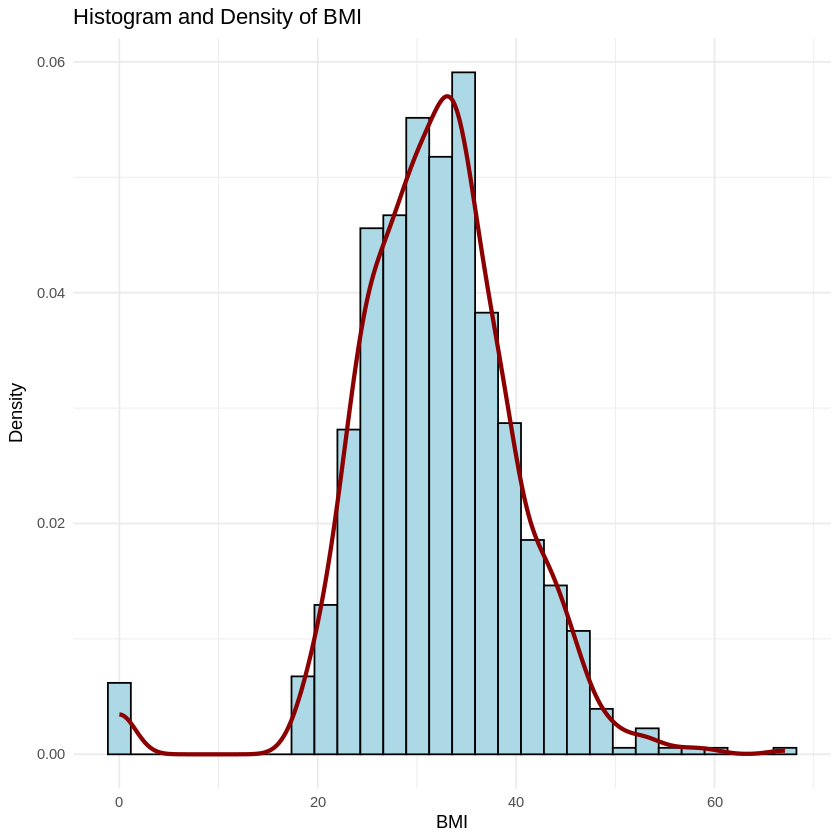

In [9]:
plot_density(df, "BMI")

**Figure 2. Histogram and Density for BMI**

Figure 2. shows the histogram and density for Body Mass Index (BMI) from the plot, it seems that the distribution appears to be approximately normal, but it is slightly right-skewed. Most BMI values fall between 25 and 40, suggesting a population with a hight prevalence of overweight and obese individuals. The KDE curve is smooth and unimoda, and the shape is almost symmetric. This makes BMI a good candidate for parametric analyses.

#### Histogram and Density of Age

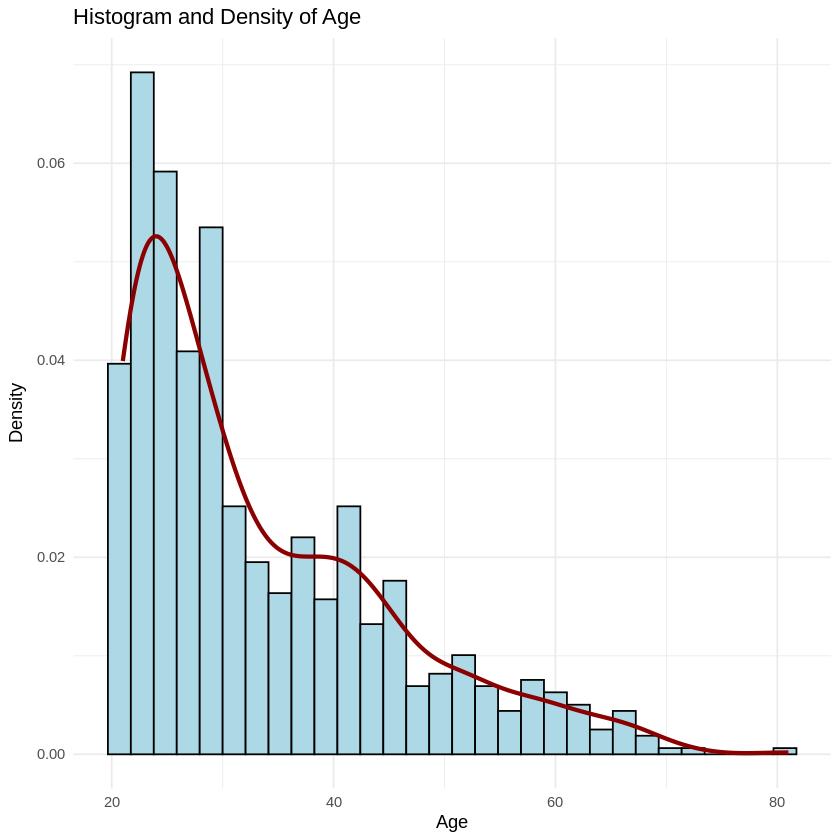

In [10]:
plot_density(df, "Age")

**Figure 3. Histogram and Density of Age**

The histogram shown above shows a somewhat bimodal distribution, which peaks in both younfer and older age brackets. This indicates the presence of two distinct groups in the dataset— possibly younger individuals being screened for possible risks, and older individuals already showing symptoms.

### Histogram and Density of Insulin

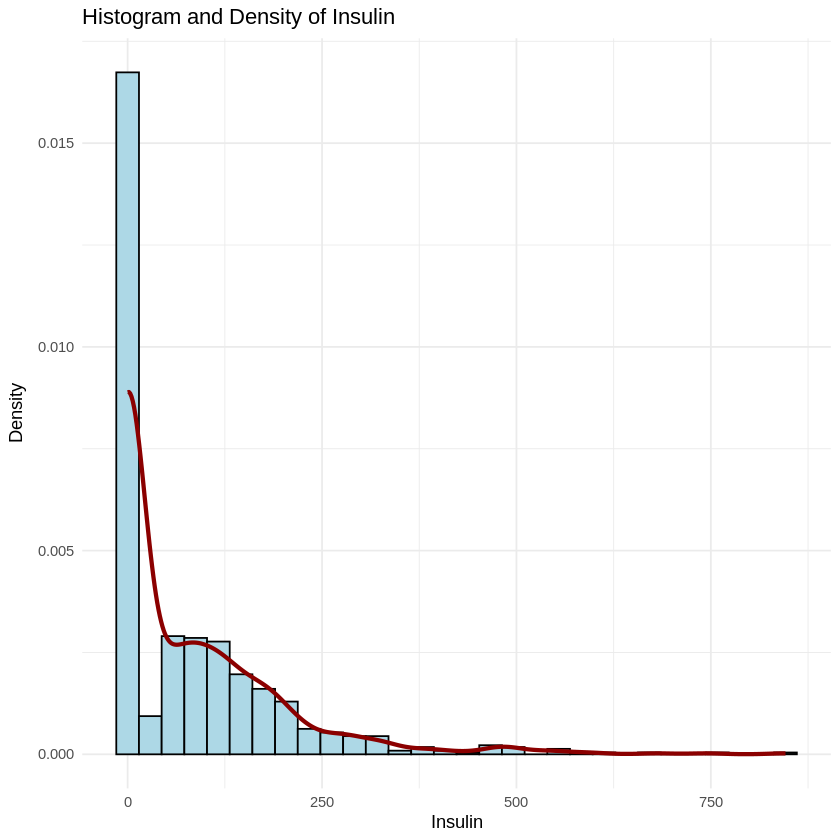

In [11]:
plot_density(df, "Insulin")

**Figure 4. Histogram and Density for Insulin**

Figure 4 shows that the insulin distribution is highly skewed to the right, with a large spike near zero. The remaining values are spread out with a long tail, showing significant variability. This kind of distribution is problematic for parametric models and might require data cleaning (e.g., treating zeros as missing) or transformation (e.g., log transformation) before being used in statistical inference.

### Comparison with Theoretical Distributions

#### Glucose vs. Normal Distribution



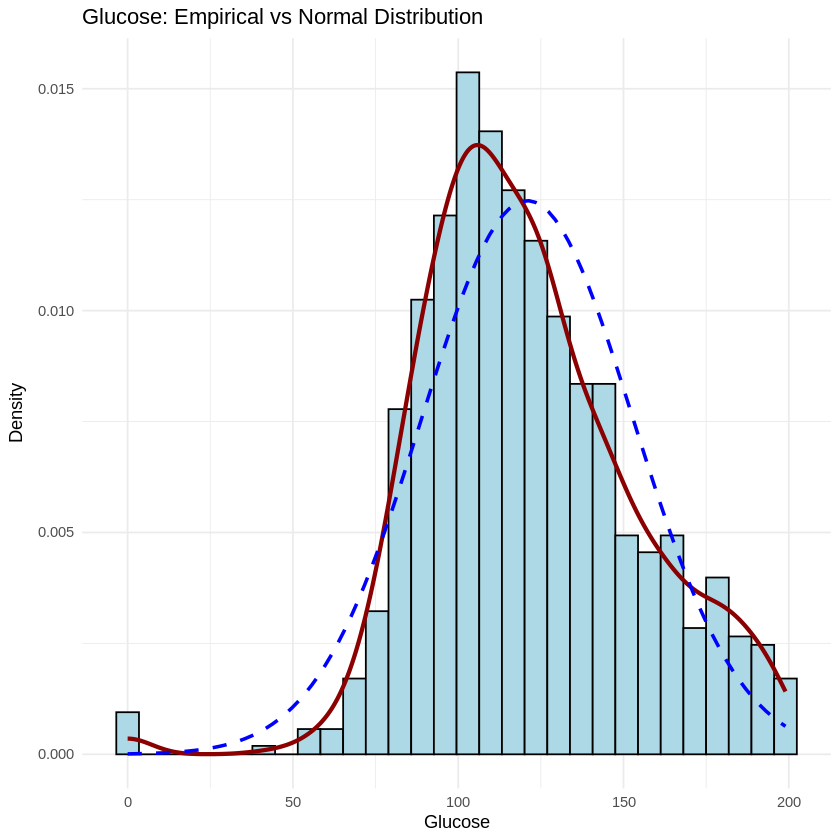

In [12]:
mu <- mean(df$Glucose, na.rm = TRUE)
sigma <- sd(df$Glucose, na.rm = TRUE)

ggplot(df, aes(x = Glucose)) +
  geom_histogram(aes(y = after_stat(density)), bins = 30, fill = "lightblue", color = "black") +
  geom_density(color = "darkred", size = 1.2) +
  stat_function(fun = dnorm,
                args = list(mean = mu, sd = sigma),
                color = "blue", linetype = "dashed", size = 1) +
  labs(title = "Glucose: Empirical vs Normal Distribution", x = "Glucose", y = "Density") +
  theme_minimal()


**Figure 5. Empirical vs. Normal Distribution of Glucose**

Figure 5 shows that comparison of empirical and normal distribution of Glucose. From the figure, it shows that glucose does not follow a normal distribution, which suggests a need for transformation or non-parametric modeling.


#### BMI vs. Normal Distribution

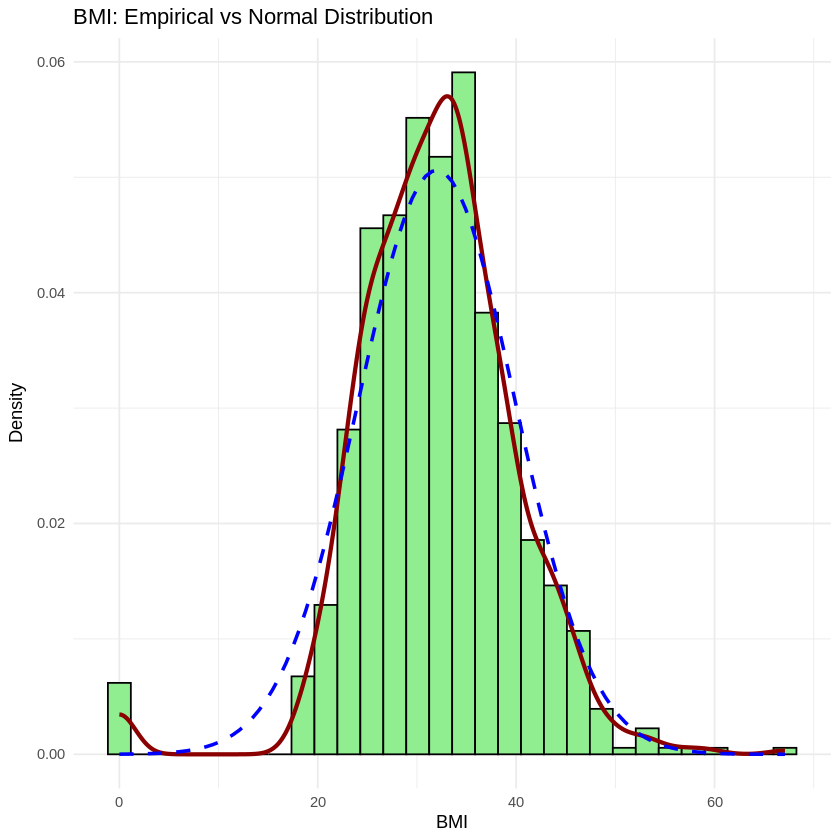

In [13]:
mu <- mean(df$BMI, na.rm = TRUE)
sigma <- sd(df$BMI, na.rm = TRUE)

ggplot(df, aes(x = BMI)) +
  geom_histogram(aes(y = after_stat(density)), bins = 30, fill = "lightgreen", color = "black") +
  geom_density(color = "darkred", size = 1.2) +
  stat_function(fun = dnorm,
                args = list(mean = mu, sd = sigma),
                color = "blue", linetype = "dashed", size = 1) +
  labs(title = "BMI: Empirical vs Normal Distribution", x = "BMI", y = "Density") +
  theme_minimal()

**Figure 6. Empirical vs. Normal Distribution of BMI.**

Figure 6. shows that comparison of empirical and normal distribution of BMI. From the figure, it shows that BMI closely approximates a normal distributions, in which parametric tests are appropriate for this variable.

#### Age vs. Normal Distribution

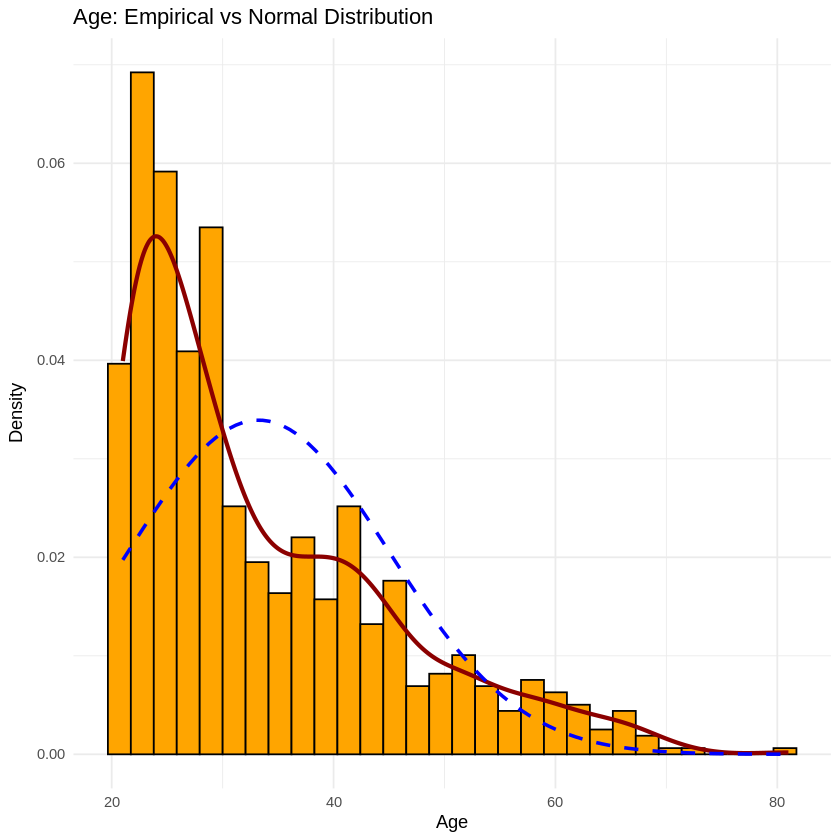

In [14]:
mu <- mean(df$Age, na.rm = TRUE)
sigma <- sd(df$Age, na.rm = TRUE)

ggplot(df, aes(x = Age)) +
  geom_histogram(aes(y = after_stat(density)), bins = 30, fill = "orange", color = "black") +
  geom_density(color = "darkred", size = 1.2) +
  stat_function(fun = dnorm,
                args = list(mean = mu, sd = sigma),
                color = "blue", linetype = "dashed", size = 1) +
  labs(title = "Age: Empirical vs Normal Distribution", x = "Age", y = "Density") +
  theme_minimal()



**Figure 7. Age vs Normal Distribution**

Figure 7. shows that comparison of empirical and normal distribution of Age. From the figure, it shows that age is not normally distributed, in which stratified analysis may be appropriate for this variable.

#### Insulin vs Normal Distribution

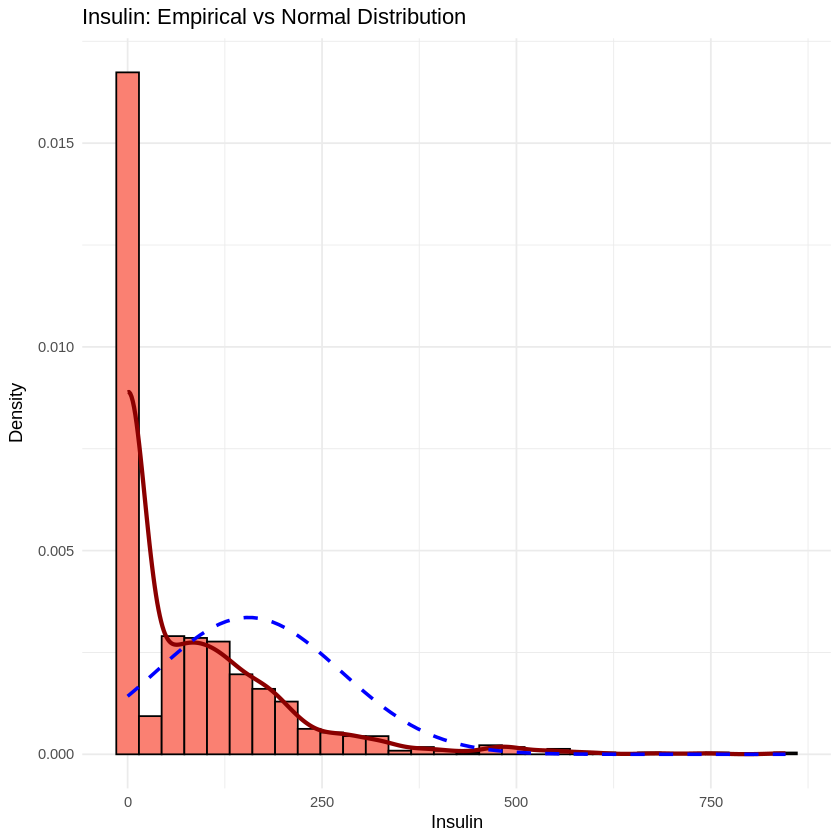

In [15]:
mu <- mean(df$Insulin[df$Insulin > 0], na.rm = TRUE)
sigma <- sd(df$Insulin[df$Insulin > 0], na.rm = TRUE)

ggplot(df, aes(x = Insulin)) +
  geom_histogram(aes(y = after_stat(density)), bins = 30, fill = "salmon", color = "black") +
  geom_density(color = "darkred", size = 1.2) +
  stat_function(fun = dnorm,
                args = list(mean = mu, sd = sigma),
                color = "blue", linetype = "dashed", size = 1) +
  labs(title = "Insulin: Empirical vs Normal Distribution", x = "Insulin", y = "Density") +
  theme_minimal()



**Figure 8. Insulin vs Normal Distribution**

Figure 8. shows the comparison between the empirical and normal distribution of insulin. From the plot, it shows that insulin is high skewed, and it needs cleaning transformation before conducting such analysis.


#### Outcome as a Binomial Variable

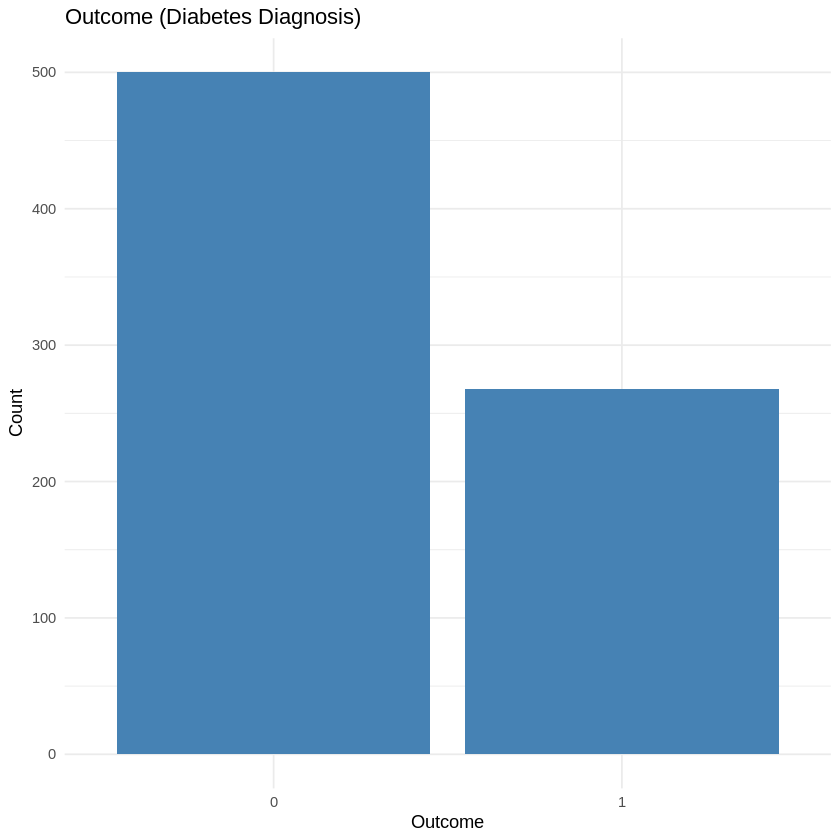

In [16]:

ggplot(df, aes(x = factor(Outcome))) +
  geom_bar(fill = "steelblue") +
  labs(title = "Outcome (Diabetes Diagnosis)", x = "Outcome", y = "Count") +
  theme_minimal()


**Figure 9. Outcome of Diagnostic Diagnosis**

Figure 9. shows a bar graph of the outcome of a patient, whether a patient is diabetic (1) or non-diabetic (0). The bar plot above shows that approximately 500 individuals are non-diabetic, while 268 are diabetic, which aligns with a binomial distribution with unequal probabilities.

this, this confirms that logistic regression is an appropriate modeling technique for predicting diabetes based on other health-related factors in the dataset, since the binary nature of this variable makes it suitable for classification models.


### Conclusion and Findings

This section aims to explore the underlying distributions of key variables in the diabetes datset using histogram-based and kernel density estimation techniques.
These were compared with known theoretical distributions, such as normal and binomial. Poission and Exponential Distributions were excluded since the dataset does not have the variables that are needed to conduct these analyses, such as time. From the findings, the following conclusions are made:

- Glucose and insulin were highly right-skewed, indicating that standard parametric models may not be suitable unless transformations are applied.

- BMI closely followed a normal distribution, making it well-suited for models assuming normality.

- The age variable displayed a slightly bimodal pattern, suggesting the presence of distinct age subgroups that could benefit from stratified analysis.

- The outcome variable, which indicates whether a patient is diabetic or not, followed a binomial distribution, confirming that logistic regression is appropriate for classification.

Overall, this foundation enhances the accuracy and reliability of identifying significant predictors of diabetes, ensuring that statistical techniques are applied to variables that meet their assumption.
